In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
corr_hc = np.load('corr_hc.npy')
corr_schz = np.load('corr_schz.npy')

In [4]:
corr_hc = corr_hc.reshape(52,118*118)
corr_schz = corr_schz.reshape(50,118*118)

In [5]:
X = np.append(corr_hc,corr_schz,axis=0)

In [6]:
X.shape

(102, 13924)

In [7]:
X[0].shape

(13924,)

In [8]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [9]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [11]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [12]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [13]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [14]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.571845 (0.138296)
SVM: 0.638631 (0.136986)
KNN: 0.535536 (0.157887)
LR: 0.653214 (0.127111)
MLP: 0.710060 (0.144832)
RF: 0.635952 (0.126980)
ET: 0.644286 (0.109247)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.969455, p:0.084896
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.170961, p:0.983669
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

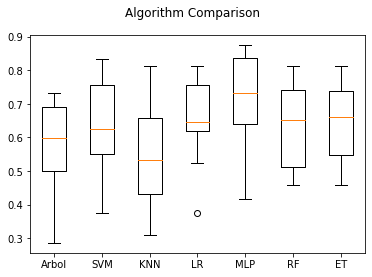

In [15]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.563810 (0.233082)
SVM: 0.614762 (0.240900)
KNN: 0.500357 (0.249825)
LR: 0.632857 (0.246147)
MLP: 0.669048 (0.228485)
RF: 0.586310 (0.258739)
ET: 0.597976 (0.219788)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957011, p:0.017170
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.163939, p:0.985359
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

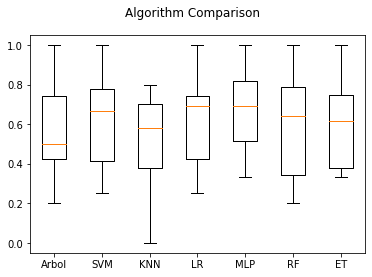

In [16]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.607738 (0.186119)
SVM: 0.632738 (0.177218)
KNN: 0.520833 (0.316062)
LR: 0.643452 (0.200631)
MLP: 0.734524 (0.164618)
RF: 0.670833 (0.233771)
ET: 0.660714 (0.254509)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.945287, p:0.004140
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.714620, p:0.132223
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

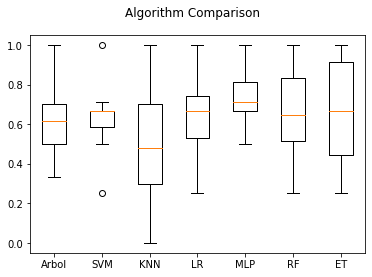

In [17]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.545455 (0.127532)
SVM: 0.635455 (0.120977)
KNN: 0.539091 (0.117835)
LR: 0.653636 (0.116807)
MLP: 0.714545 (0.131375)
RF: 0.597273 (0.122106)
ET: 0.588182 (0.085382)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.956984, p:0.017112
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.159166, p:0.986448
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

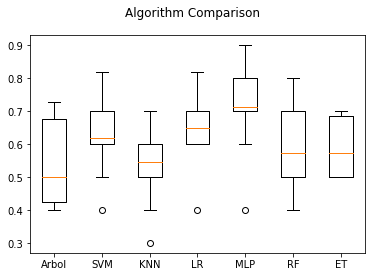

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 2 components

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(X)

PCA(n_components=2)

In [22]:
X_pca2 = pca.transform(X)

In [23]:
X_pca2.shape

(102, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.563036 (0.144517)
SVM: 0.597560 (0.114921)
KNN: 0.639226 (0.177934)
LR: 0.532500 (0.099141)
MLP: 0.536190 (0.143598)
RF: 0.632381 (0.080458)
ET: 0.520417 (0.083462)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.985115, p:0.575485
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.250801, p:0.293034
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

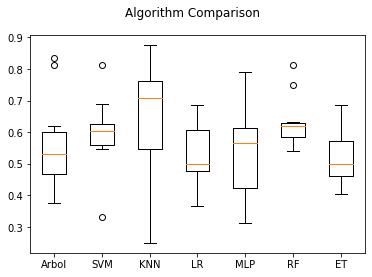

In [24]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.531905 (0.192834)
SVM: 0.526667 (0.261428)
KNN: 0.637381 (0.290628)
LR: 0.516071 (0.244850)
MLP: 0.513095 (0.276511)
RF: 0.613810 (0.202215)
ET: 0.500000 (0.217051)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.962807, p:0.035840
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.161839, p:0.985844
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

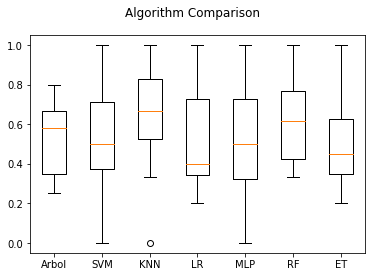

In [25]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.548214 (0.267770)
SVM: 0.522024 (0.233164)
KNN: 0.520238 (0.278279)
LR: 0.483929 (0.207874)
MLP: 0.502976 (0.276811)
RF: 0.610119 (0.253116)
ET: 0.438690 (0.180310)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.949331, p:0.006690
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.499244, p:0.806582
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

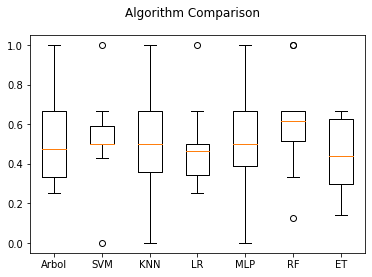

In [26]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.520909 (0.130292)
SVM: 0.560000 (0.144268)
KNN: 0.626364 (0.165417)
LR: 0.480909 (0.068569)
MLP: 0.491818 (0.137837)
RF: 0.578182 (0.109333)
ET: 0.480000 (0.077545)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.960734, p:0.027488
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.308582, p:0.266513
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

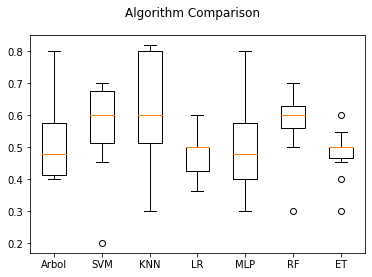

In [27]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 10 components

In [28]:
pca = PCA(n_components=10)

In [29]:
pca.fit(X)

PCA(n_components=10)

In [30]:
X_pca10 = pca.transform(X)

In [31]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.616012 (0.120468)
SVM: 0.628214 (0.141538)
KNN: 0.747024 (0.136360)
LR: 0.591429 (0.203376)
MLP: 0.577321 (0.154446)
RF: 0.576548 (0.165005)
ET: 0.550357 (0.196291)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.972086, p:0.119595
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.786511, p:0.583774
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

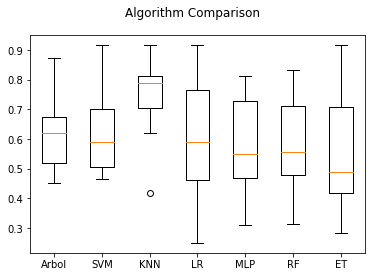

In [32]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.597500 (0.242099)
SVM: 0.567857 (0.282540)
KNN: 0.686667 (0.315242)
LR: 0.560000 (0.277208)
MLP: 0.555000 (0.306236)
RF: 0.549524 (0.253644)
ET: 0.534405 (0.327106)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938482, p:0.001893
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.225264, p:0.967110
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

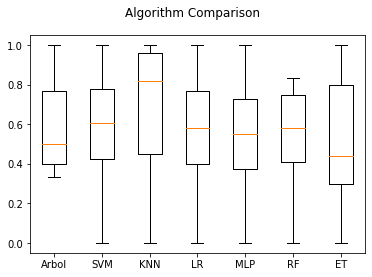

In [33]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.577381 (0.196717)
SVM: 0.597619 (0.295363)
KNN: 0.691071 (0.289905)
LR: 0.556548 (0.318408)
MLP: 0.446429 (0.241831)
RF: 0.523214 (0.316166)
ET: 0.465476 (0.327433)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938750, p:0.001951
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.696944, p:0.652972
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

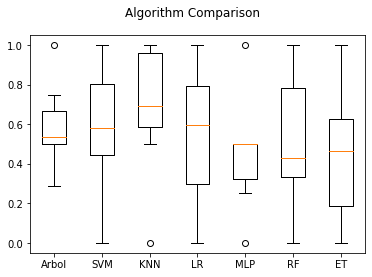

In [34]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.590000 (0.106364)
SVM: 0.628182 (0.118073)
KNN: 0.714545 (0.106111)
LR: 0.589091 (0.170551)
MLP: 0.567273 (0.121845)
RF: 0.590000 (0.136451)
ET: 0.521818 (0.175772)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.965547, p:0.051056
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.673208, p:0.671614
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

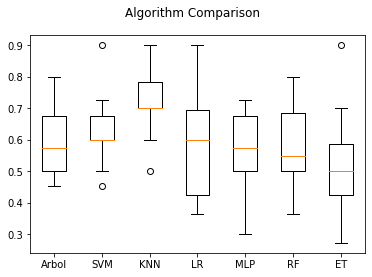

In [35]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [36]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [37]:
pca = PCA(n_components=100)

In [38]:
pca.fit(X)

PCA(n_components=100)

In [39]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.502321 (0.207704)
SVM: 0.658274 (0.139687)
KNN: 0.535536 (0.157887)
LR: 0.653214 (0.127111)
MLP: 0.605179 (0.108865)
RF: 0.466012 (0.146655)
ET: 0.474821 (0.136024)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.967056, p:0.062109
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.435144, p:0.215454
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

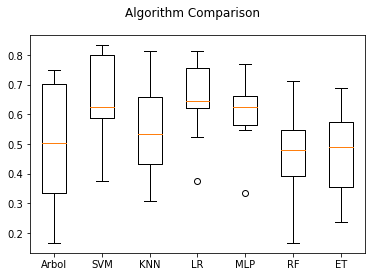

In [40]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.470714 (0.211726)
SVM: 0.620000 (0.216769)
KNN: 0.500357 (0.249825)
LR: 0.632857 (0.246147)
MLP: 0.599048 (0.204845)
RF: 0.344762 (0.268851)
ET: 0.307143 (0.174135)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.958073, p:0.019619
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.326594, p:0.920599
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

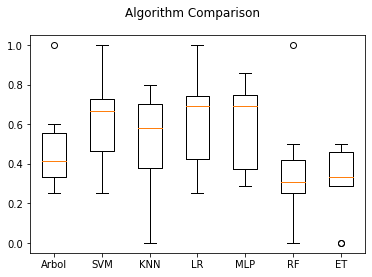

In [41]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.534524 (0.288992)
SVM: 0.697024 (0.208256)
KNN: 0.520833 (0.316062)
LR: 0.643452 (0.200631)
MLP: 0.641667 (0.169905)
RF: 0.429167 (0.354559)
ET: 0.422619 (0.327814)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.945087, p:0.004043
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.183822, p:0.056167
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

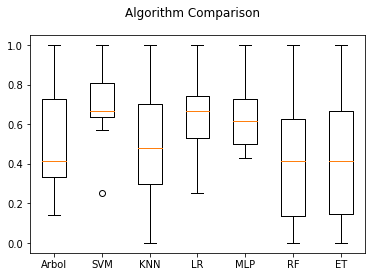

In [42]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.459091 (0.188129)
SVM: 0.645455 (0.121764)
KNN: 0.539091 (0.117835)
LR: 0.653636 (0.116807)
MLP: 0.605455 (0.137342)
RF: 0.362727 (0.125997)
ET: 0.390000 (0.145990)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.951086, p:0.008269
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.160026, p:0.339023
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

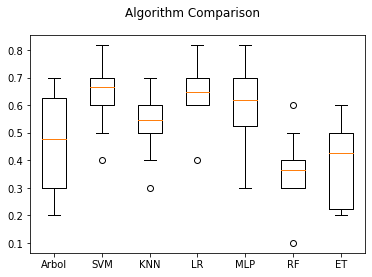

In [43]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [44]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [45]:
from sklearn.manifold import TSNE

In [46]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.590417 (0.150174)
SVM: 0.613929 (0.139911)
KNN: 0.625060 (0.167687)
LR: 0.537857 (0.188118)
MLP: 0.518393 (0.198288)
RF: 0.671071 (0.157330)
ET: 0.580595 (0.115153)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.985258, p:0.583669
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.725110, p:0.630976
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

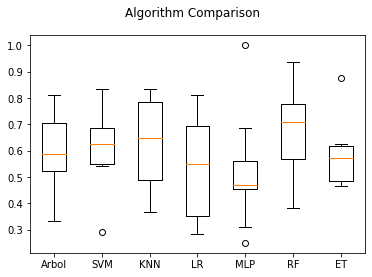

In [47]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.577619 (0.247106)
SVM: 0.615476 (0.264119)
KNN: 0.633333 (0.229976)
LR: 0.505238 (0.238416)
MLP: 0.513333 (0.279762)
RF: 0.688333 (0.293830)
ET: 0.554286 (0.232164)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.950125, p:0.007361
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.162676, p:0.985652
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

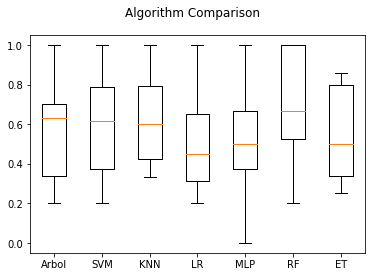

In [48]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.594643 (0.165267)
SVM: 0.545833 (0.206986)
KNN: 0.576786 (0.222215)
LR: 0.507143 (0.251594)
MLP: 0.427381 (0.248262)
RF: 0.555952 (0.186267)
ET: 0.572619 (0.187963)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.955086, p:0.013506
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.478116, p:0.822138
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

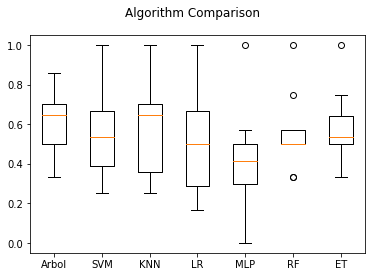

In [49]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.589091 (0.161644)
SVM: 0.597273 (0.145798)
KNN: 0.629091 (0.156078)
LR: 0.490909 (0.164141)
MLP: 0.541818 (0.200792)
RF: 0.639091 (0.126755)
ET: 0.580000 (0.126543)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.970956, p:0.103237
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.567919, p:0.754269
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

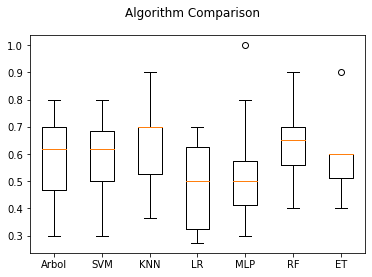

In [50]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [51]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.607857 (0.115899)
SVM: 0.448512 (0.145584)
KNN: 0.444881 (0.163256)
LR: 0.496548 (0.139741)
MLP: 0.411012 (0.244448)
RF: 0.460357 (0.132353)
ET: 0.457381 (0.138218)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957397, p:0.018022
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.909568, p:0.493973
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

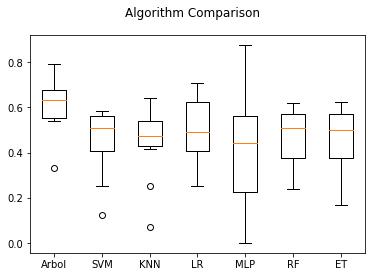

In [52]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.553095 (0.313723)
SVM: 0.396429 (0.354436)
KNN: 0.450000 (0.374907)
LR: 0.418333 (0.310416)
MLP: 0.380556 (0.394024)
RF: 0.453968 (0.313197)
ET: 0.459921 (0.303173)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.895496, p:0.000026
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.399544, p:0.876604
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

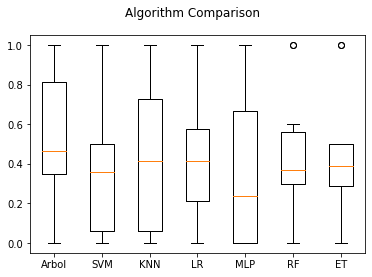

In [53]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.524405 (0.280135)
SVM: 0.320238 (0.287714)
KNN: 0.211310 (0.163431)
LR: 0.423810 (0.314439)
MLP: 0.320238 (0.313005)
RF: 0.391071 (0.307203)
ET: 0.455357 (0.347970)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.912003, p:0.000119
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.325800, p:0.259010
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

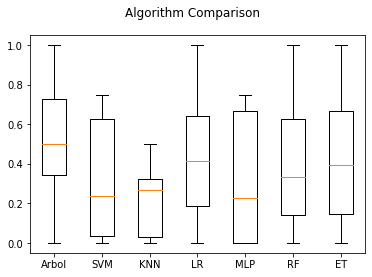

In [54]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.547273 (0.146575)
SVM: 0.380909 (0.138674)
KNN: 0.430000 (0.136063)
LR: 0.430909 (0.140142)
MLP: 0.361818 (0.245515)
RF: 0.391818 (0.115598)
ET: 0.371818 (0.081459)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.975299, p:0.181122
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.225093, p:0.305514
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

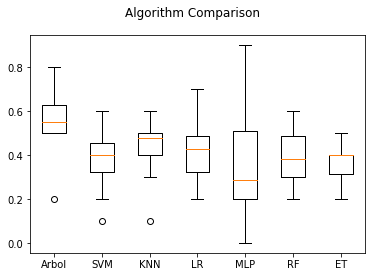

In [55]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [56]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [57]:
from umap import UMAP

In [58]:
reducer = UMAP()

In [59]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.638631 (0.174764)
SVM: 0.632083 (0.111065)
KNN: 0.593690 (0.144580)
LR: 0.628512 (0.186439)
MLP: 0.549048 (0.160077)
RF: 0.651131 (0.125066)
ET: 0.609464 (0.147160)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.987704, p:0.727684
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.632161, p:0.703946
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

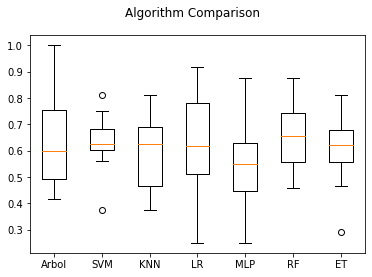

In [60]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.574167 (0.279793)
SVM: 0.577738 (0.211303)
KNN: 0.560000 (0.277108)
LR: 0.580000 (0.294090)
MLP: 0.499762 (0.355524)
RF: 0.611905 (0.240420)
ET: 0.563333 (0.240116)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.944163, p:0.003630
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.441630, p:0.848175
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

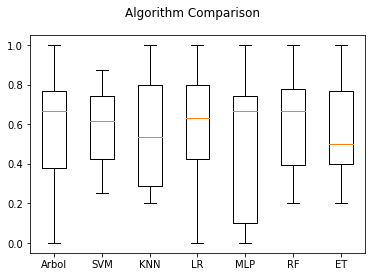

In [61]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.632738 (0.284422)
SVM: 0.722024 (0.225721)
KNN: 0.549405 (0.229858)
LR: 0.585714 (0.294354)
MLP: 0.455952 (0.336635)
RF: 0.661905 (0.189297)
ET: 0.624405 (0.199497)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.923921, p:0.000393
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.021039, p:0.419990
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

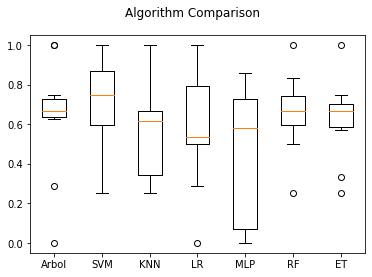

In [62]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.625455 (0.179568)
SVM: 0.646364 (0.102968)
KNN: 0.569091 (0.115293)
LR: 0.597273 (0.170029)
MLP: 0.607273 (0.161900)
RF: 0.644545 (0.115741)
ET: 0.579091 (0.121699)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964285, p:0.043360
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.618985, p:0.714318
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

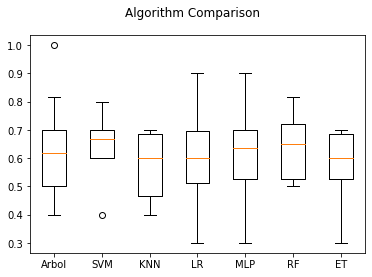

In [63]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [64]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [65]:
reducer = UMAP(n_components=10)

In [66]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.607083 (0.182486)
SVM: 0.687321 (0.134439)
KNN: 0.591488 (0.163468)
LR: 0.702798 (0.131158)
MLP: 0.625119 (0.111679)
RF: 0.626429 (0.209036)
ET: 0.658155 (0.161864)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.970366, p:0.095593
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.209739, p:0.313172
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

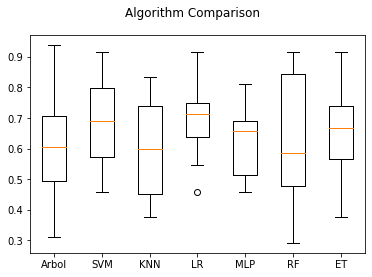

In [67]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.595238 (0.250598)
SVM: 0.657143 (0.234485)
KNN: 0.593333 (0.301496)
LR: 0.677143 (0.234088)
MLP: 0.632619 (0.220626)
RF: 0.588333 (0.258419)
ET: 0.637143 (0.242400)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.945103, p:0.004051
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.048587, p:0.999497
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

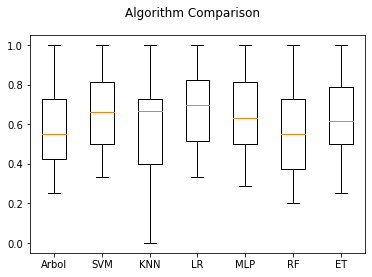

In [68]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.592262 (0.257309)
SVM: 0.651786 (0.231872)
KNN: 0.514286 (0.215985)
LR: 0.670238 (0.221445)
MLP: 0.575000 (0.229922)
RF: 0.616667 (0.273696)
ET: 0.643452 (0.234352)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.953434, p:0.011015
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.392053, p:0.881454
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

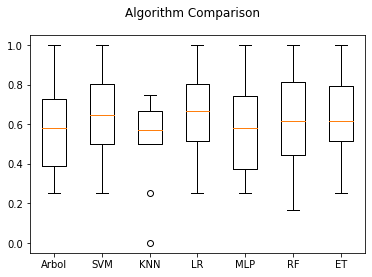

In [69]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.555455 (0.163911)
SVM: 0.666364 (0.127859)
KNN: 0.605455 (0.129857)
LR: 0.684545 (0.127406)
MLP: 0.616364 (0.132228)
RF: 0.588182 (0.187636)
ET: 0.626364 (0.148516)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.961963, p:0.032161
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.426301, p:0.858749
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

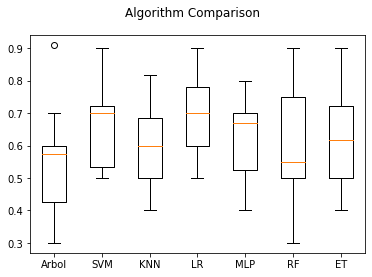

In [70]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# Isomap

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.553929 (0.143713)
SVM: 0.641488 (0.117655)
KNN: 0.623571 (0.156804)
LR: 0.628512 (0.122114)
MLP: 0.618095 (0.115574)
RF: 0.573869 (0.191203)
ET: 0.573571 (0.117700)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.970855, p:0.101893
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.388278, p:0.883871
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

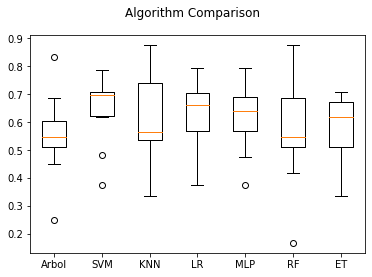

In [71]:
from sklearn import manifold
clf = manifold.Isomap(10, n_components=2)
X_iso2 = clf.fit_transform(X)
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='auroc')
!mv temp.csv tempiso2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.530833 (0.289637)
SVM: 0.630000 (0.285657)
KNN: 0.580238 (0.294057)
LR: 0.609762 (0.249942)
MLP: 0.606905 (0.252151)
RF: 0.535833 (0.276688)
ET: 0.526071 (0.287619)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.950252, p:0.007474
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.059123, p:0.999117
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

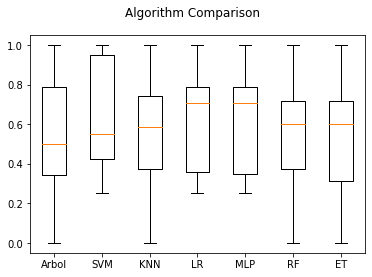

In [72]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.508333 (0.250513)
SVM: 0.554167 (0.237894)
KNN: 0.605952 (0.247462)
LR: 0.601786 (0.205274)
MLP: 0.568452 (0.159969)
RF: 0.556548 (0.268890)
ET: 0.545833 (0.270922)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947067, p:0.005106
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.417683, p:0.864587
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

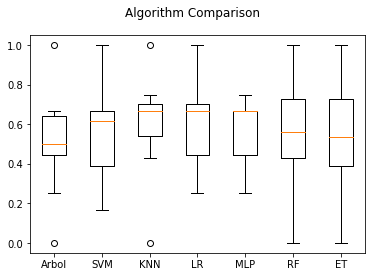

In [73]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.540000 (0.121710)
SVM: 0.578182 (0.123529)
KNN: 0.599091 (0.124877)
LR: 0.597273 (0.131366)
MLP: 0.597273 (0.131366)
RF: 0.549091 (0.160176)
ET: 0.539091 (0.086822)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.952273, p:0.009554
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.364303, p:0.898793
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

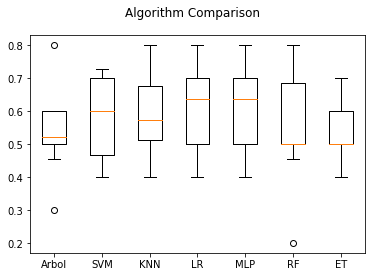

In [74]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.645060 (0.186361)
SVM: 0.635952 (0.129461)
KNN: 0.524643 (0.189893)
LR: 0.622619 (0.205748)
MLP: 0.592619 (0.174832)
RF: 0.636905 (0.164662)
ET: 0.623512 (0.214274)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.969895, p:0.089908
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.559647, p:0.760678
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

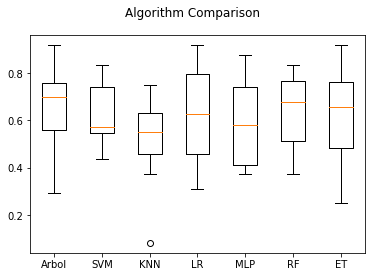

In [75]:
clf = manifold.Isomap(10, n_components=10)
X_iso10 = clf.fit_transform(X)
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.620714 (0.230116)
SVM: 0.627857 (0.263041)
KNN: 0.503571 (0.240172)
LR: 0.623095 (0.236574)
MLP: 0.597500 (0.234107)
RF: 0.660238 (0.318502)
ET: 0.633571 (0.364082)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938530, p:0.001904
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.155272, p:0.341580
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

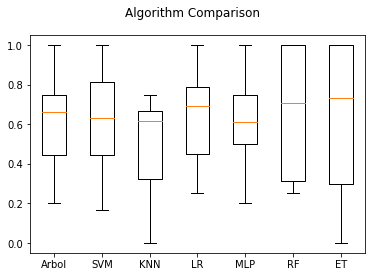

In [76]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.695238 (0.276652)
SVM: 0.631548 (0.202073)
KNN: 0.644048 (0.310093)
LR: 0.608929 (0.285665)
MLP: 0.569048 (0.224543)
RF: 0.600000 (0.254227)
ET: 0.552381 (0.311131)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.927373, p:0.000564
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.511952, p:0.797083
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

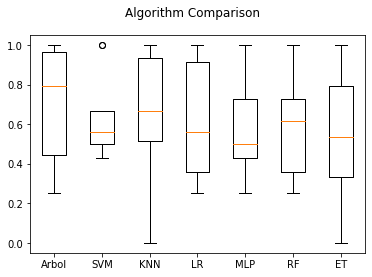

In [77]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.647273 (0.155015)
SVM: 0.598182 (0.120110)
KNN: 0.497273 (0.169445)
LR: 0.614545 (0.167835)
MLP: 0.586364 (0.156736)
RF: 0.618182 (0.118740)
ET: 0.598182 (0.174432)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.961485, p:0.030252
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.736270, p:0.622311
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

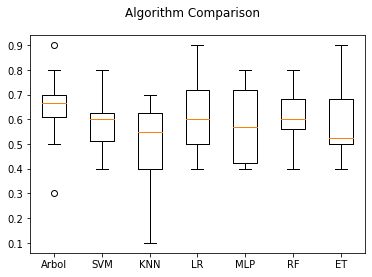

In [78]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# LLE

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.668750 (0.181831)
SVM: 0.485119 (0.069785)
KNN: 0.621131 (0.106013)
LR: 0.554881 (0.102900)
MLP: 0.534524 (0.083844)
RF: 0.673333 (0.156524)
ET: 0.646250 (0.171743)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.975117, p:0.176950
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.316226, p:0.043899
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

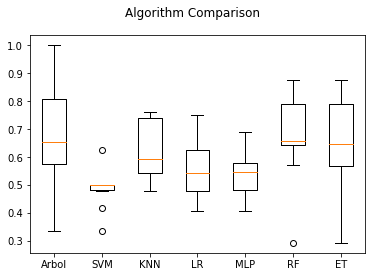

In [79]:
clf = manifold.LocallyLinearEmbedding(10, n_components=2,method='standard')
X_lle2 = clf.fit_transform(X)
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.652500 (0.368180)
SVM: 0.301212 (0.292349)
KNN: 0.560238 (0.307676)
LR: 0.567857 (0.219064)
MLP: 0.476190 (0.329054)
RF: 0.662500 (0.285123)
ET: 0.648571 (0.283562)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.918735, p:0.000232
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.815866, p:0.561693
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

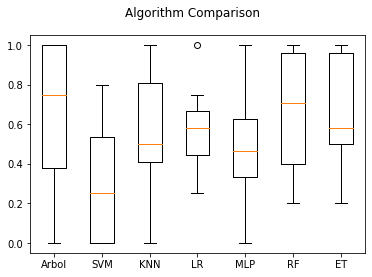

In [80]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.550595 (0.343254)
SVM: 0.503571 (0.459161)
KNN: 0.497619 (0.245758)
LR: 0.440476 (0.162708)
MLP: 0.363690 (0.328585)
RF: 0.621429 (0.273696)
ET: 0.558929 (0.249098)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.936739, p:0.001557
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.546958, p:0.004341
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

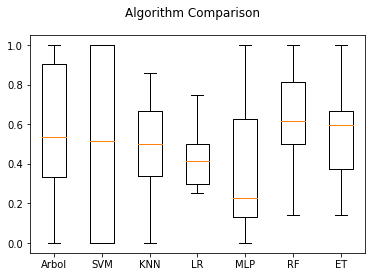

In [81]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.618182 (0.167628)
SVM: 0.467273 (0.195706)
KNN: 0.598182 (0.117185)
LR: 0.528182 (0.135174)
MLP: 0.470909 (0.132540)
RF: 0.617273 (0.158007)
ET: 0.597273 (0.170029)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.971446, p:0.110042
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.829230, p:0.551766
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

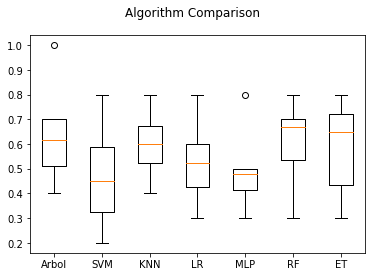

In [82]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.567083 (0.110513)
SVM: 0.490417 (0.095266)
KNN: 0.641726 (0.181014)
LR: 0.534762 (0.098189)
MLP: 0.608929 (0.145689)
RF: 0.597560 (0.117708)
ET: 0.546667 (0.126815)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938990, p:0.002005
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.275405, p:0.281485
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

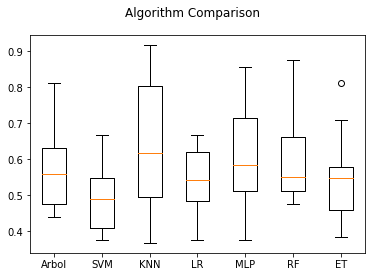

In [83]:
clf = manifold.LocallyLinearEmbedding(10, n_components=10,method='standard')
X_lle10 = clf.fit_transform(X)
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.557778 (0.160693)
SVM: 0.463571 (0.214640)
KNN: 0.628333 (0.241068)
LR: 0.433571 (0.263705)
MLP: 0.622381 (0.299003)
RF: 0.576071 (0.168426)
ET: 0.515000 (0.204321)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.954397, p:0.012402
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.098145, p:0.373486
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

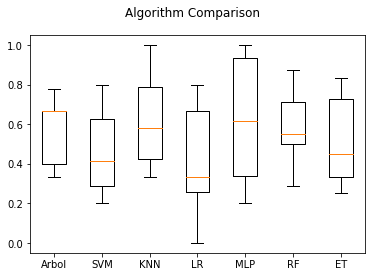

In [84]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.552976 (0.250601)
SVM: 0.563095 (0.327416)
KNN: 0.567262 (0.263631)
LR: 0.539286 (0.312080)
MLP: 0.585119 (0.274069)
RF: 0.606548 (0.185165)
ET: 0.514881 (0.243528)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.932870, p:0.001017
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.755250, p:0.607654
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

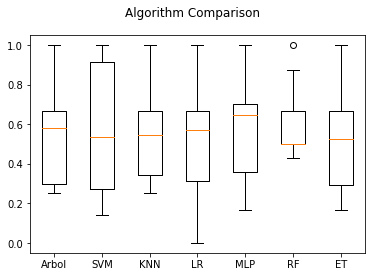

In [85]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.568182 (0.111433)
SVM: 0.452727 (0.177438)
KNN: 0.599091 (0.179460)
LR: 0.451818 (0.163538)
MLP: 0.557273 (0.176328)
RF: 0.587273 (0.133249)
ET: 0.529091 (0.127195)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964422, p:0.044134
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.407983, p:0.871060
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

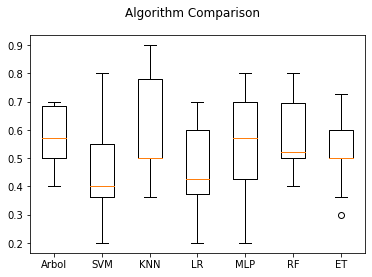

In [86]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.519167 (0.133317)
SVM: 0.512202 (0.036607)
KNN: 0.504167 (0.078711)
LR: 0.533036 (0.088673)
MLP: 0.465595 (0.116563)
RF: 0.646369 (0.111409)
ET: 0.553512 (0.109606)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.962392, p:0.033983
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.834048, p:0.106693
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

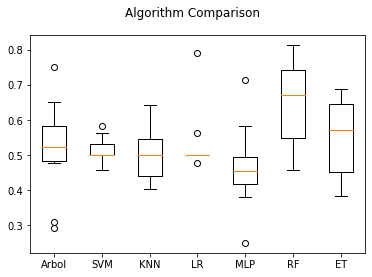

In [87]:
clf = manifold.LocallyLinearEmbedding(10, n_components=100,method='standard')
X_lle100 = clf.fit_transform(X)
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.498333 (0.197828)
SVM: 0.370794 (0.324982)
KNN: 0.336667 (0.344384)
LR: 0.193066 (0.235616)
MLP: 0.459524 (0.161880)
RF: 0.626190 (0.253701)
ET: 0.574405 (0.290940)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.933223, p:0.001057
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.935628, p:0.475994
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

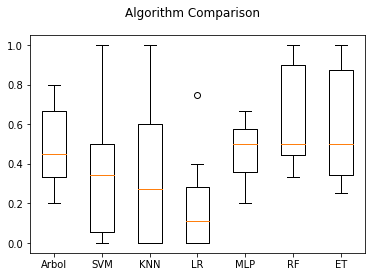

In [88]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.532143 (0.218481)
SVM: 0.425000 (0.419076)
KNN: 0.352381 (0.333299)
LR: 0.441667 (0.453459)
MLP: 0.466667 (0.223404)
RF: 0.569048 (0.269521)
ET: 0.507738 (0.362187)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.903802, p:0.000055
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.820936, p:0.017010
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

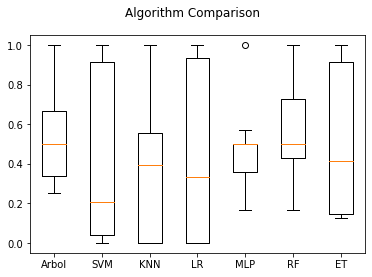

In [89]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.488182 (0.113695)
SVM: 0.477273 (0.172787)
KNN: 0.461818 (0.136412)
LR: 0.382727 (0.156904)
MLP: 0.470909 (0.074612)
RF: 0.578182 (0.077160)
ET: 0.440909 (0.107584)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.960996, p:0.028423
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.936940, p:0.475100
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

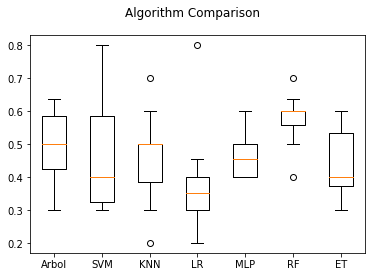

In [90]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# MDS

In [91]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds2 = clf.fit_transform(X)
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='auroc')

OSError: [Errno 12] Cannot allocate memory

In [ ]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='precision')

In [ ]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='recall')

In [ ]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [ ]:
clf = manifold.MDS(n_components=10, n_init=1, max_iter=100)
X_mds10 = clf.fit_transform(X)
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [ ]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='precision')

In [ ]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='recall')

In [ ]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [ ]:
clf = manifold.MDS(n_components=100, n_init=1, max_iter=100)
X_mds100 = clf.fit_transform(X)
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [ ]:
compare_methods(XumaX_mds10p10,Y,listAlgorithms,listParams,listNames,metric='precision')

In [ ]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

In [ ]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')